# OpenCitations

## OC Meta

In [52]:
tar_file = "/run/media/leo/b9827f00-f8da-4458-bc94-97b28f1a0989/meta_2025_02_13_csv.tar"

In [53]:
from collections import Counter
import polars as pl
import tarfile


def extract_date(df):
    years_list = df.select(pl.col('pub_date').str.extract(r'(\d{4})').alias('year')).to_series().to_list()
    
    #try: 
        #if years_df.filter(pl.col('year').cast(pl.Int64) > 2025).filter(pl.col('year').cast(pl.Int64) < 9999).shape[0] > 0:
            #print('found', years_df.filter(pl.col('year').cast(pl.Int64) > 2025).to_dicts())
        #if len([int(year) for year in years_list if int(year) > 2025]) > 0:
            #print('found', [int(x) for x in df.select(pl.col('pub_date'))['pub_date'].to_list() if int(x) > 2025])
    #except TypeError:
        #pass

    return years_list


years_counter = Counter()

i = 0
with tarfile.open(tar_file, "r:*") as tar:
    while True:
        csv_member = tar.next()
        if csv_member is None:
            break
        if csv_member.isfile() and csv_member.name.endswith('.csv'):
            print(i, csv_member)
            df = pl.read_csv(tar.extractfile(csv_member), columns=['id', 'title', 'pub_date'], schema_overrides = {"pub_date": pl.String})
            years_counter.update(extract_date(df))
        i += 1



print(years_counter)

1 <TarInfo 'meta_output_csv/output_13544.csv' at 0x7fc82715d600>
2 <TarInfo 'meta_output_csv/output_35895.csv' at 0x7fc82715d840>
3 <TarInfo 'meta_output_csv/output_23979.csv' at 0x7fc82715d900>
4 <TarInfo 'meta_output_csv/output_11498.csv' at 0x7fc82715da80>
5 <TarInfo 'meta_output_csv/output_9818.csv' at 0x7fc82715db40>
6 <TarInfo 'meta_output_csv/output_5046.csv' at 0x7fc82715dc00>
7 <TarInfo 'meta_output_csv/output_26118.csv' at 0x7fc82715dcc0>
8 <TarInfo 'meta_output_csv/output_28521.csv' at 0x7fc82715dd80>
9 <TarInfo 'meta_output_csv/output_29602.csv' at 0x7fc82715d6c0>
10 <TarInfo 'meta_output_csv/output_33346.csv' at 0x7fc82715d9c0>
11 <TarInfo 'meta_output_csv/output_19522.csv' at 0x7fc82715d780>
12 <TarInfo 'meta_output_csv/output_23244.csv' at 0x7fc82715e080>
13 <TarInfo 'meta_output_csv/output_9349.csv' at 0x7fc82715e140>
14 <TarInfo 'meta_output_csv/output_32234.csv' at 0x7fc82715df00>
15 <TarInfo 'meta_output_csv/output_22046.csv' at 0x7fc82715e200>
16 <TarInfo 'meta_outp

In [54]:
none_count = years_counter[None] if None in years_counter else 0
none_count

15867675

In [55]:
future_count = sum(count for year, count in years_counter.items()
                   if year is not None and year.isdigit() and int(year) > 2025)

future_count

124309

In [56]:
pl.DataFrame({'year': list(years_counter.keys()), 'count': list(years_counter.values())}).sort('year').write_csv('/run/media/leo/b9827f00-f8da-4458-bc94-97b28f1a0989/meta_2025_02_13_yearly_count.csv')

In [66]:
sorted(filtered_years.keys())

[1951,
 1952,
 1953,
 1954,
 1955,
 1956,
 1957,
 1958,
 1959,
 1960,
 1961,
 1962,
 1963,
 1964,
 1965,
 1966,
 1967,
 1968,
 1969,
 1970,
 1971,
 1972,
 1973,
 1974,
 1975,
 1976,
 1977,
 1978,
 1979,
 1980,
 1981,
 1982,
 1983,
 1984,
 1985,
 1986,
 1987,
 1988,
 1989,
 1990,
 1991,
 1992,
 1993,
 1994,
 1995,
 1996,
 1997,
 1998,
 1999,
 2000,
 2001,
 2002,
 2003,
 2004,
 2005,
 2006,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013,
 2014,
 2015,
 2016,
 2017,
 2018,
 2019,
 2020,
 2021,
 2022,
 2023,
 2024,
 2025]

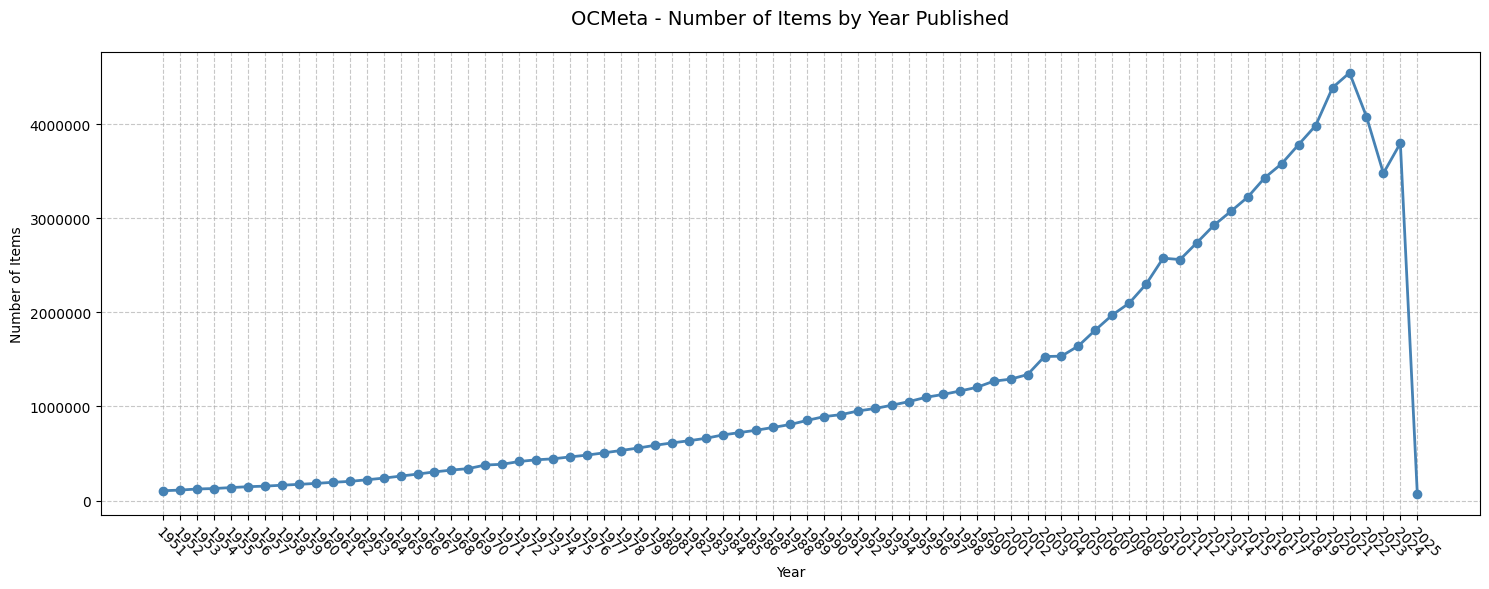

In [92]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker


fig, ax = plt.subplots(figsize=(15, 6))

filtered_years = {
    int(year): count
    for year, count in years_counter.items()
    if year is not None and year.isdigit() and 1950 < int(year) <= 2025
}

sorted_years = dict(sorted(filtered_years.items()))

plt.plot(sorted_years.keys(), sorted_years.values(),
         marker='o',
         linewidth=2,
         markersize=6,
         color='steelblue')

plt.title('OCMeta - Number of Items by Year Published', pad=20, size=14)
plt.xlabel('Year')
plt.ylabel('Number of Items')
ax.yaxis.grid(True, linestyle='--', alpha=0.7)
ax.xaxis.grid(True, linestyle='--', alpha=0.7)

ax.ticklabel_format(style='plain', axis='y')

plt.xticks(sorted(filtered_years.keys()), rotation=-45, ha='left', va='top', rotation_mode='anchor')
plt.tight_layout()
plt.show()


## OC Index

---

# IRIS

In [6]:
import polars as pl
from zipfile import ZipFile

iris_path = '/run/media/leo/b9827f00-f8da-4458-bc94-97b28f1a0989/iris-data-2025-05-30.zip'

In [26]:
df_iris_master = pl.read_csv(ZipFile(iris_path).open("POSTPROCESS-iris-data-2025-05-27/ODS_L1_IR_ITEM_MASTER_ALL.csv").read(
))
df_iris_identifier = pl.read_csv(ZipFile(iris_path).open("POSTPROCESS-iris-data-2025-05-27/ODS_L1_IR_ITEM_IDENTIFIER.csv").read(), columns=[
                                 'ITEM_ID', 'IDE_DOI', 'IDE_ISBN', 'IDE_PMID'], schema_overrides={'ITEM_ID': pl.Int64, 'IDE_DOI': pl.Utf8, 'IDE_ISBN': pl.Utf8, 'IDE_PMID': pl.Utf8}, ignore_errors=True)

iris_df = df_iris_identifier.join(df_iris_master, on='ITEM_ID', how='inner')

In [29]:
iris_df

ITEM_ID,IDE_DOI,IDE_ISBN,IDE_PMID,DATE_ISSUED_YEAR,TITLE,OWNING_COLLECTION,OWNING_COLLECTION_DES
i64,str,str,str,i64,str,i64,str
71134,null,null,null,2005,"""Applications of CeCl3.7H2O-NaI…",58,"""4.02 Riassunto (Abstract)"""
65970,null,null,null,2005,"""Radioattività naturale delle m…",58,"""4.02 Riassunto (Abstract)"""
71969,null,null,null,2006,"""Gli istituti generali di sempl…",41,"""2.01 Capitolo / saggio in libr…"
60479,null,"""8883125150""",null,2005,"""Sport e società: contributi mu…",50,"""3.02 Curatela"""
72395,null,null,null,2004,"""Commento all’art.8 d.lgs. 154/…",35,"""1.01 Articolo in rivista"""
…,…,…,…,…,…,…,…
944078,null,null,null,2022,"""Early non-disabling relapses a…",40,"""1.06 Abstract in rivista"""
944079,null,null,null,2024,"""κ-index as a possible predicti…",40,"""1.06 Abstract in rivista"""
944080,null,null,null,2012,"""The Italian version of the Mot…",40,"""1.06 Abstract in rivista"""


In [35]:
# DATE_ISSUED_YEAR	Y	NUMBER(10,0)	anno indicato in date.issued	Anno di pubblicazione del prodotto

# was 304_983
df_iris_master

ITEM_ID,DATE_ISSUED_YEAR,TITLE,OWNING_COLLECTION,OWNING_COLLECTION_DES
i64,i64,str,i64,str
2715,9999,"""""Pasture da pigliare occhi per…",73,"""7.09 Prodotto artistico e spet…"
1641,2007,"""Biliary strictures and stenosi…",41,"""2.01 Capitolo / saggio in libr…"
2766,2008,"""Bothriocephalidean tapeworms (…",35,"""1.01 Articolo in rivista"""
1656,2007,"""I movimenti delle pelvi Il paz…",41,"""2.01 Capitolo / saggio in libr…"
2619,2010,"""L'immagine del ""fiorino rosso""…",35,"""1.01 Articolo in rivista"""
…,…,…,…,…
724571,2022,"""La Costituzione di Dobbs v. Ja…",35,"""1.01 Articolo in rivista"""
724483,2012,"""Commento agli articoli da 99 a…",41,"""2.01 Capitolo / saggio in libr…"
724118,2021,"""Assessing the impact of previo…",35,"""1.01 Articolo in rivista"""


In [46]:
years = df_iris_master.select(pl.col('DATE_ISSUED_YEAR'))

years.null_count()

#years.drop_nulls().filter(pl.col('DATE_ISSUED_YEAR').cast(pl.Int64) > 2027).count()

DATE_ISSUED_YEAR
u32
6480


In [47]:
years_df = years.drop_nulls().group_by('DATE_ISSUED_YEAR').len().sort('DATE_ISSUED_YEAR').sort('DATE_ISSUED_YEAR')
years_df

DATE_ISSUED_YEAR,len
i64,u32
1953,1
1967,1
1975,6
1976,3
1977,10
…,…
2023,19018
2024,17820
2025,3674


In [ ]:
years_df.write_csv('/run/media/leo/b9827f00-f8da-4458-bc94-97b28f1a0989/iris_DATE_ISSUED_YEAR_2025-05-30.csv')

In [49]:
years_df

DATE_ISSUED_YEAR,len
i64,u32
1953,1
1967,1
1975,6
1976,3
1977,10
…,…
2023,19018
2024,17820
2025,3674


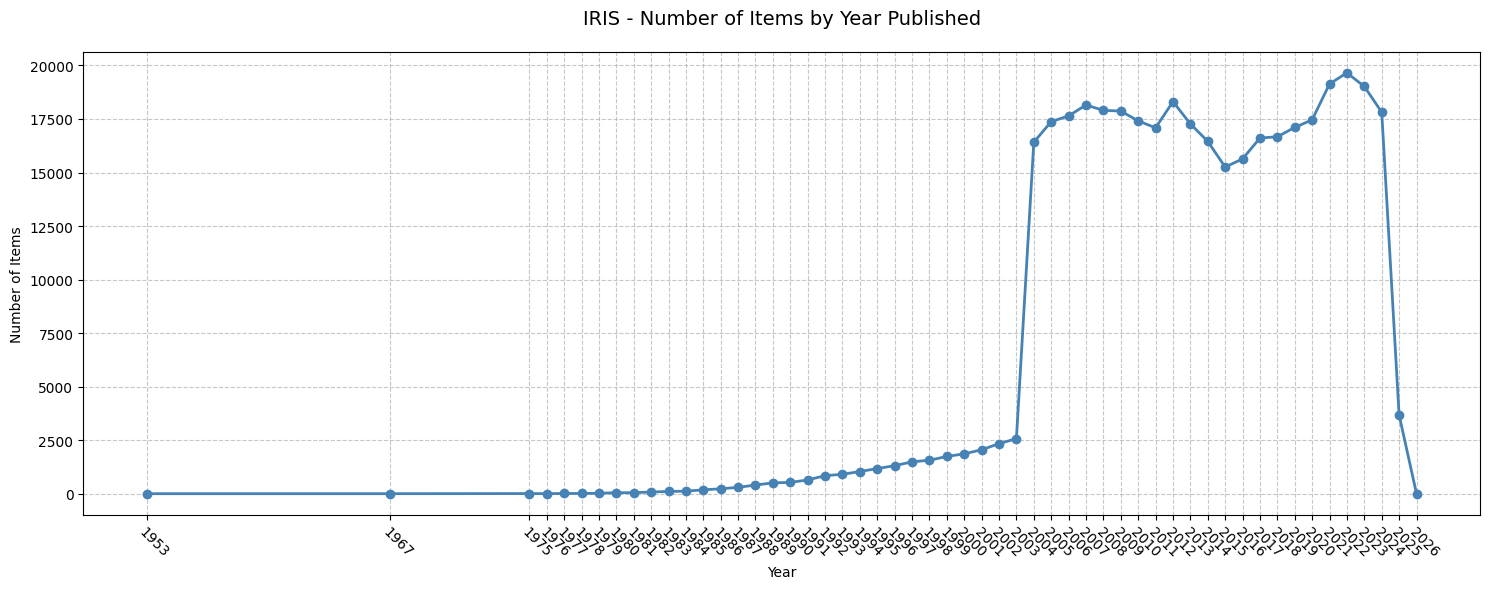

In [75]:
# plot year distribution
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(15, 6))

years_df = years_df.filter(pl.col('DATE_ISSUED_YEAR') < 2030)

plt.plot(years_df['DATE_ISSUED_YEAR'], years_df['len'],
         marker='o',
         linewidth=2,
         markersize=6,
         color='steelblue')

plt.title('IRIS - Number of Items by Year Published', pad=20, size=14)
plt.xlabel('Year')
plt.ylabel('Number of Items')
ax.yaxis.grid(True, linestyle='--', alpha=0.7)
ax.xaxis.grid(True, linestyle='--', alpha=0.7)

#plt.legend(['Iris No ID', 'IRIS dump'], loc='upper left')


plt.xticks(years_df['DATE_ISSUED_YEAR'], rotation=-45, ha='left', va='top', rotation_mode='anchor')
plt.tight_layout()
plt.show()
